# Modern Portfolio Theory

## Background Knowledges
- We are **rational (理性)** and called **risk avertors** (aka 風險趨避者 or 風險厭惡者).
    - However, this does not implies that we mininize the risk we take.
    - Instead, we are willing to take risk when we are compensated by **proper risk premium**.
- References
    - Risk aversion [wiki](https://en.wikipedia.org/wiki/Risk_aversion)
    - Expected utility hypothesis [wiki](https://en.wikipedia.org/wiki/Expected_utility_hypothesis)

## Mean-Variance Analysis
- Let $R_i$ be the annualized return rate for stock $i = 1,2,\ldots,n.$
- Let $\omega$ be the weight vector of portfolio $\pi$ with its annualized return rates $R_{\pi}$.
    - More explicitly, $$R_{\pi} = \omega \cdot R = \sum_i^n \omega_i R_i.$$
- Let $U$ be your utility (happiness) function.
- [Markowitz](https://en.wikipedia.org/wiki/Harry_Markowitz) (1952) proposes a mathematical framework for assembling a portfolio of assets such that the resulting untility is maximized for a given level of risk.
- The optimization formula is $$\max_{\omega} \{U(R_{\pi})\} = \max_{\omega} \left\{ \mathbf{E}(R_{\pi}) - \dfrac{1}{2} \lambda \mathbf{\text{Var}}(R_{\pi}) \right\},$$ where $\lambda$ is the coefficient of risk aversion.
    - Markowitz (1952): [Portfolio Selection](https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf)
    - Markowitz (1959): [Portfolio Selection: Efficient Diversification of Investments](https://www.jstor.org/stable/j.ctt1bh4c8h)
    - Markowitz won 1990 Nobel Memorial Prize in Economic Sciences [link](https://www.nobelprize.org/uploads/2018/06/markowitz-lecture.pdf)
    - Video of an interview with Markowitz in Masters of Finance [link](https://www.youtube.com/watch?v=RVWEhCd819E)
    - 
MIT OpenCourseWare: [Portfolio Theory](https://www.youtube.com/watch?v=ywl3pq6yc54)
    - [十分鐘讀懂理財投資學 - 什麼是最好的投資組合？](https://kopu.chat/2017/05/28/%E5%8D%81%E5%88%86%E9%90%98%E8%AE%80%E6%87%82%E7%90%86%E8%B2%A1%E6%8A%95%E8%B3%87%E5%AD%B8-%E4%BB%80%E9%BA%BC%E6%98%AF%E6%9C%80%E5%A5%BD%E7%9A%84%E6%8A%95%E8%B3%87%E7%B5%84%E5%90%88%EF%BC%9F/)

In [1]:
%%capture

!pip install --upgrade pandas-datareader
!pip install ffn

In [2]:
import ffn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)
sns.set_style("whitegrid")

### Example 1: One Risky Asset & One Risk-Free Asset

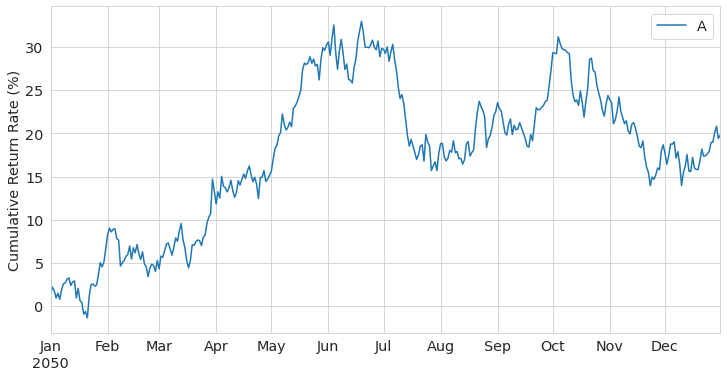

In [3]:
asset_names = ["A"]
rs = np.random.RandomState(2021)
values = rs.randn(365, len(asset_names)) / 100
dates = pd.date_range("2050-01-01", periods = 365, freq = "D")
tbl = pd.DataFrame(values * 100, dates, columns = asset_names)

tbl2 = (1 + tbl / 100).cumprod(axis = 0)
(tbl2 * 100 - 100).plot.line(grid = True, ylabel = "Cumulative Return Rate (%)")

In [4]:
return_rates = (tbl2.iloc[-1] - 1) * 100
print(return_rates)
stds = tbl.std() * np.sqrt(tbl.shape[0])
print(stds)

A    19.784012
Name: 2050-12-31 00:00:00, dtype: float64
A    18.993995
dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


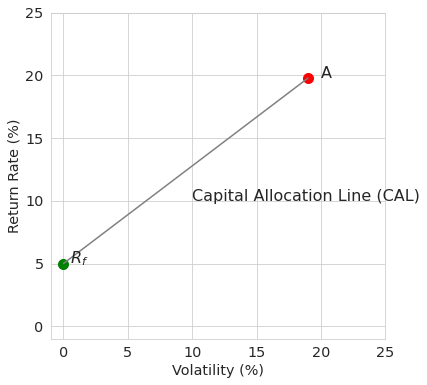

In [5]:
plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlim(-1, 25)
plt.ylim(-1, 25)

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(0, 5, "go", ms = 10)
plt.plot([0, stds], [5, return_rates], "-", color = "gray")
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.text(stds + 1, return_rates, "A", fontsize = 16)
plt.text(0.5, 5, "$R_f$", fontsize = 16)
plt.text(10, 10, "Capital Allocation Line (CAL)", fontsize = 16)
plt.show()

### Example 2: Two Risky Assets
- Assume that we have two assets, A and B, in the portfolio, denoted by $\pi$.
- Then the return rate of $\pi$ denoted by $R_{\pi}$ is $$R_{\pi} = \omega_A R_A + \omega_B R_B.$$
- It is easy to show that the variance of $\pi$ is $$\text{Var}(R_{\pi}) = \omega_A^2 \sigma_A^2 + \omega_B^2 \sigma_B^2 + 2 \rho_{AB} \sigma_A \sigma_B,$$ where $\rho_{AB}$ is the correlation between A and B, a key factor to the portfolio.


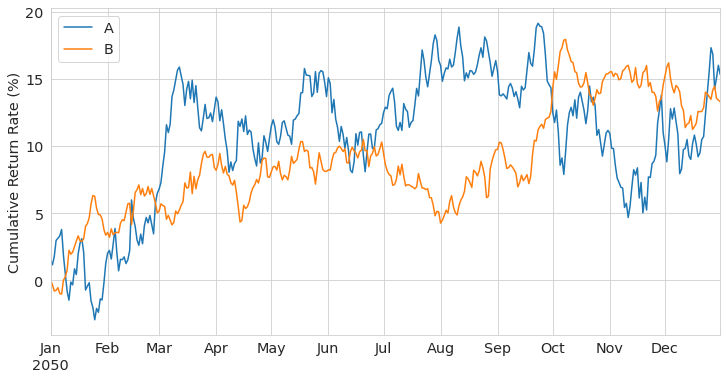

In [6]:
asset_names = ["A", "B"]
rs = np.random.RandomState(2021)
values = rs.randn(365, len(asset_names)) / 100 + 0.0005
dates = pd.date_range("2050-01-01", periods = 365, freq = "D")
tbl = pd.DataFrame(values * 100, dates, columns = asset_names)
tbl["B"] = tbl["B"] * 0.5 - tbl["A"] * 0.25

tbl2 = (1 + tbl / 100).cumprod(axis = 0)
(tbl2 * 100 - 100).plot.line(grid = True, ylabel = "Cumulative Return Rate (%)")

A    15.346494
B    13.325547
Name: 2050-12-31 00:00:00, dtype: float64
A    18.820268
B    10.696305
dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

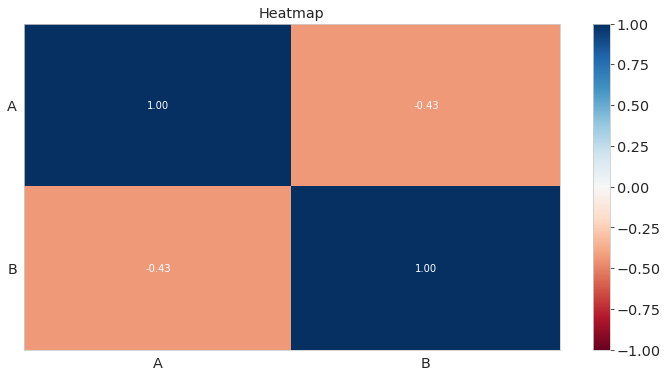

In [7]:
return_rates = (tbl2.iloc[-1] - 1) * 100
print(return_rates)
stds = tbl.std() * np.sqrt(tbl.shape[0])
print(stds)

tbl.plot_corr_heatmap()

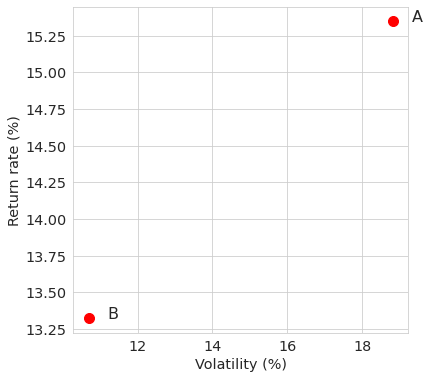

In [8]:
plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
for idx, item in enumerate(asset_names):
    plt.text(stds[idx] + 0.5, return_rates[idx], item, fontsize = 16)

- Now we take $\omega_B = 1 - \omega_A.$

In [9]:
alpha = np.linspace(0, 1, 101)
beta = 1 - alpha

w = np.column_stack([alpha, beta])
R = np.zeros((w.shape[0], 1))
V = np.zeros((w.shape[0], 1))
for i in range(w.shape[0]):
    curr_p = (tbl / 100).dot(w[i, :])
    R[i] = ((curr_p + 1).cumprod()[-1] - 1) * 100
    V[i] = curr_p.std() * np.sqrt(tbl.shape[0]) * 100

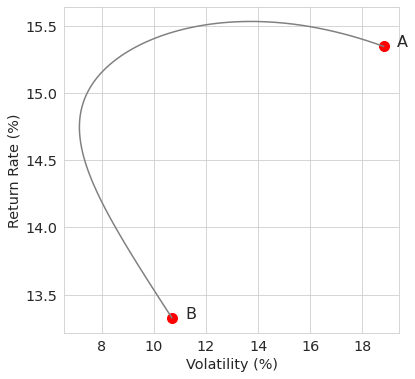

In [10]:
plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
for idx, item in enumerate(asset_names):
    plt.text(stds[idx] + 0.5, return_rates[idx], item, fontsize = 16)
plt.plot(V, R, "-", color = "gray")

#### Case 1: Maximum Return Portfolio

[0.78 0.22] [13.82003328] [15.5326759]


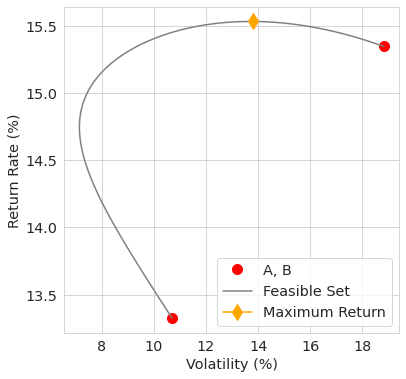

In [11]:
idx = np.argmax(R)
print(w[idx], V[idx], R[idx])

plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, "-", color = "gray")
plt.plot(V[idx], R[idx], color = "orange", marker = "d", ms = 12)
plt.legend([", ".join(asset_names), "Feasible Set", "Maximum Return"], loc = "best")

#### Case 2: Minimum Variance Portfolio (MVP)

[0.31 0.69] [7.14589089] [14.73260541]


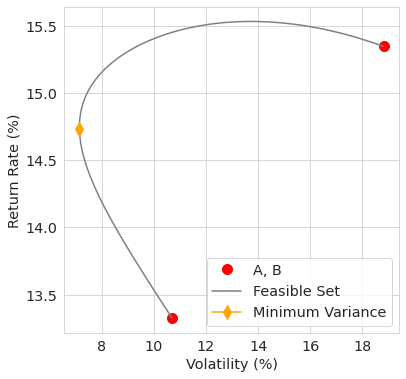

In [12]:
idx = np.argmin(V)
print(w[idx], V[idx], R[idx])

plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, "-", color = "gray")
plt.plot(V[idx], R[idx], color = "orange", marker = "d", ms = 10)
plt.legend([", ".join(asset_names), "Feasible Set", "Minimum Variance"], loc = "best")

#### Case 3: Maximum Sharpe Ratio

[0.33 0.67] [7.15717198] [14.79966436] [2.06780896]


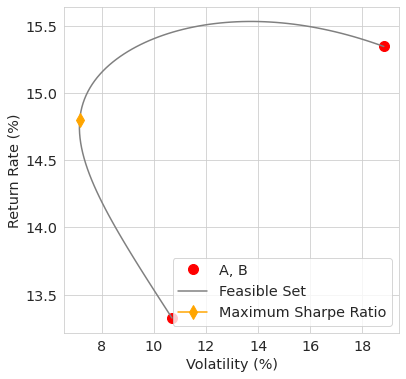

In [13]:
sharpe_ratios = R / V
idx = np.argmax(sharpe_ratios)
print(w[idx], V[idx], R[idx], sharpe_ratios[idx])

plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, "-", color = "gray")
plt.plot(V[idx], R[idx], color = "orange", marker = "d", ms = 10)
plt.legend([", ".join(asset_names), "Feasible Set", "Maximum Sharpe Ratio"], loc = "best")

#### Case 4: Maximum Quadratic Utility
- Let $x$ be one $n$-dimensional column vector to be determined.
- Let $p$ be one $n$-dimensional column vector and $Q$ be one $n$-by-$n$ matrix.
- Then the QP problem is formulated as follows: $$\dfrac{1}{2}x^T Q x + p ^ T x$$ subject to $$A x \preceq b, $$ where $A$ is the coefficient matrix and $b$ is the constant vector.
- For example, https://cvxopt.org/examples/tutorial/qp.html.
- References:
    - Convex optimization (CVXOPT) [link](https://cvxopt.org/documentation/index.html)
    

In [14]:
def optimize(return_rates):

    from cvxopt import matrix
    from cvxopt.blas import dot
    from cvxopt.solvers import qp, options

    options['show_progress'] = False
    
    return_rates = return_rates / 100
    N = return_rates.shape[1]

    p_ = (((1 + return_rates).cumprod() ** (365 / len(return_rates))) - 1)
    p = matrix(p_.values[-1, :].T)
    S = matrix(return_rates.cov().values * 365)        
    G = matrix(-np.eye(N))
    h = matrix(0.0, (N, 1))
    A = matrix(1.0, (1, N))
    b = matrix(1.0)
    
    risk_coeff = np.linspace(0, 4, 101).tolist()
    weights = [qp(lmda * S, -p, G, h, A, b)["x"] for lmda in risk_coeff]

    R_opt = np.array([(np.dot(1 + return_rates.values, w).cumprod()[-1] - 1) * 100 for w in weights])
    V_opt = np.array([np.sqrt(np.array(dot(w, S * w))) * 100 for w in weights])
    
    return weights, R_opt, V_opt

weights, R_opt, V_opt = optimize(tbl)

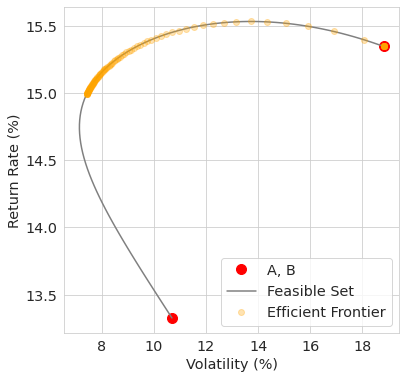

In [15]:
plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, "-", color = "gray")
plt.plot(V_opt, R_opt, "o", color = "orange", alpha = 0.3)
plt.legend([", ".join(asset_names), "Feasible Set", "Efficient Frontier"], loc = "best")

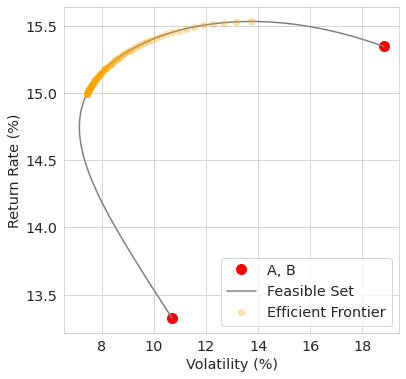

In [16]:
plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, "-", color = "gray")
idx = np.argmax(R)
plt.plot(V_opt[V_opt < V[idx]], R_opt[V_opt < V[idx]], "o", color = "orange", alpha = 0.3)
plt.legend([", ".join(asset_names), "Feasible Set", "Efficient Frontier"], loc = "best")

### Example 3: Three Assets

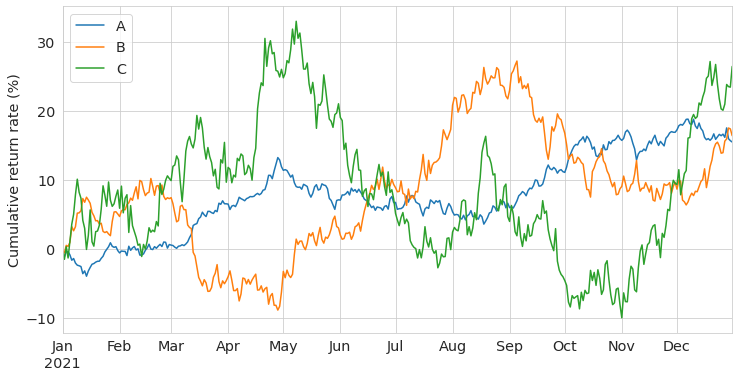

In [17]:
asset_names = ["A", "B", "C"]
rs = np.random.RandomState(1001)
values = rs.randn(365, len(asset_names)) / 100 + 0.001
dates = pd.date_range("2021-01-01", periods = 365, freq = "D")
tbl = pd.DataFrame(values, dates, columns = asset_names) * 100
tbl["A"] = tbl["A"] * 0.5
tbl["B"] = tbl["B"] - tbl["A"] * 1.2
tbl["C"] = tbl["C"] * 2

tbl2 = (1 + tbl / 100).cumprod(axis = 0)
(tbl2 * 100 - 100).plot.line(grid = True, ylabel = "Cumulative return rate (%)")

A    15.508807
B    16.427797
C    26.464447
Name: 2021-12-31 00:00:00, dtype: float64
A     9.945218
B    21.288293
C    36.379197
dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

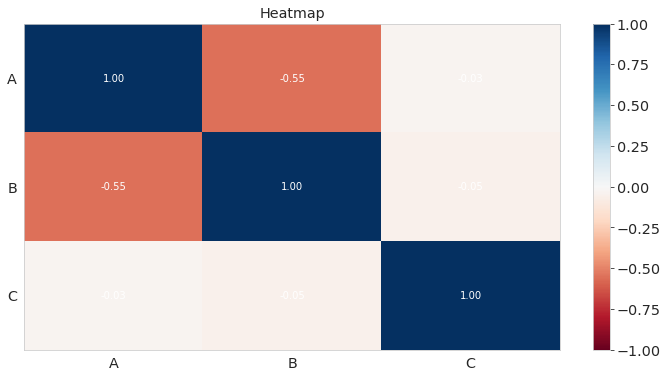

In [18]:
return_rates = (tbl2.iloc[-1] - 1) * 100
print(return_rates)
stds = tbl.std() * np.sqrt(tbl.shape[0])
print(stds)

tbl.plot_corr_heatmap()

Text(0, 0.5, 'Return rate (%)')

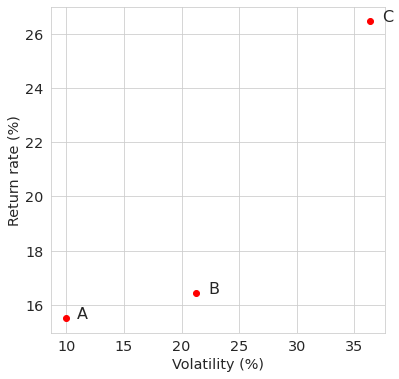

In [19]:
plt.figure(figsize = (6, 6))

plt.scatter(stds, return_rates, color = "r")
for idx, item in enumerate(asset_names):
    plt.text(stds[idx] + 1, return_rates[idx], item, fontsize = 16)
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return rate (%)")

In [20]:
alpha = np.linspace(0, 1, 1000)
beta = np.random.uniform(0, 1, 1000)
gamma = 1 - alpha - beta

w = np.column_stack([alpha, beta, gamma])
R = np.zeros((w.shape[0], 1))
V = np.zeros((w.shape[0], 1))
for i in range(w.shape[0]):
    curr_p = (tbl / 100).dot(w[i, :])
    R[i] = ((curr_p + 1).cumprod()[-1] - 1) * 100
    V[i] = curr_p.std() * np.sqrt(tbl.shape[0]) * 100

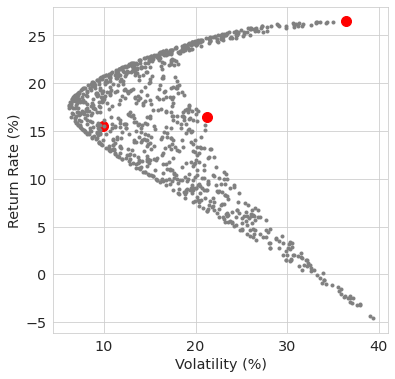

In [21]:
plt.figure(figsize = (6, 6))
plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, ".", color = "gray")
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")
plt.grid(True)

#### Maximum Sharpe Ratio

[0.68468468 0.25947643 0.05583888] [6.13940916] [17.62454518] [2.87072334]


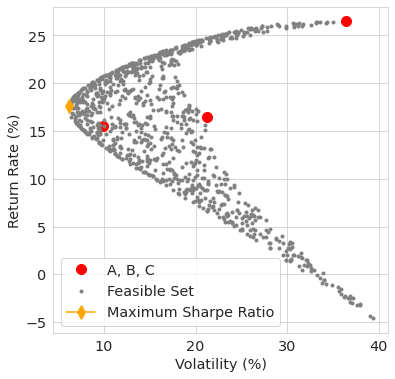

In [22]:
sharpe_ratios = R / V
idx = np.argmax(sharpe_ratios)
print(w[idx], V[idx], R[idx], sharpe_ratios[idx])

plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, ".", color = "gray")
plt.plot(V[idx], R[idx], color = "orange", marker = "d", ms = 10)
plt.legend([", ".join(asset_names), "Feasible Set", "Maximum Sharpe Ratio"], loc = "best")

#### Efficient Frontier

In [23]:
def optimize(return_rates):

    from cvxopt import matrix
    from cvxopt.blas import dot
    from cvxopt.solvers import qp, options

    options['show_progress'] = False
    
    return_rates = return_rates / 100
    N = return_rates.shape[1]

    p_ = (((1 + return_rates).cumprod() ** (365 / len(return_rates))) - 1)
    p = matrix(p_.values[-1, :].T)
    S = matrix(return_rates.cov().values * 365)        
    G = matrix(-np.eye(N))
    h = matrix(0.0, (N, 1))
    A = matrix(1.0, (1, N))
    b = matrix(1.0)
    
    risk_coeff = np.linspace(0, 100, 1001).tolist()
    weights = [qp(lmda * S, -p, G, h, A, b)["x"] for lmda in risk_coeff]

    R_opt = np.array([(np.dot(1 + return_rates.values, w).cumprod()[-1] - 1) * 100 for w in weights])
    V_opt = np.array([np.sqrt(np.array(dot(w, S * w))) * 100 for w in weights])
    
    return weights, R_opt, V_opt

weights, R_opt, V_opt = optimize(tbl)

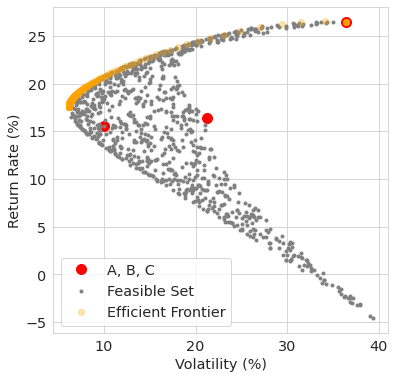

In [24]:
plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, ".", color = "gray")
plt.plot(V_opt, R_opt, "o", color = "orange", alpha = 0.3)
plt.legend([", ".join(asset_names), "Feasible Set", "Efficient Frontier"], loc = "best")

#### Two-Fund Separation Theorem
- James Tobin (1958): Liquidity Preference as Behavior Towards Risk [link](https://academic.oup.com/restud/article-abstract/25/2/65/1550009)
    - Tobin was awarded the Nobel Memorial Prize in Economics in 1981.
- For rational investors, they first determine the tangent point between the CAL and the efficient frontier, no matter what the degree of risk aversion they have.
- Then they decide to allocate the principal in the portfolio according to their own risk preference.
    - Some may be aggressive so that they borrow from the money account to leverage their portfolio.
    - Some may be conservative so that they keep part of the principal in the money account to earn the risk-free income.
- Note that the CAL now dominates the efficient frontier.
    - The investors construct their portfolios by choosing one point on the CAL depending on their own risk preference.

In [25]:
from scipy import optimize

def test_func(x, a, b, c):
    return a * x ** 2 + b * x + c
params, params_covariance = optimize.curve_fit(test_func, R_opt, V_opt, p0 = [1, 0, np.min(R_opt)])
print(params)

[  0.35254936 -12.40015683 115.20047137]


In [26]:
def f(x):
    a, b, c = params
    Rf = 5
    return (x - b) ** 2 - 4 * a * Rf * x - 4 * a * c

sol = optimize.root(f, x0 = 1)
beta = sol.x
print(beta)

[0.47686969]


In [27]:
def tangent(x):
    return beta * (x - 5)

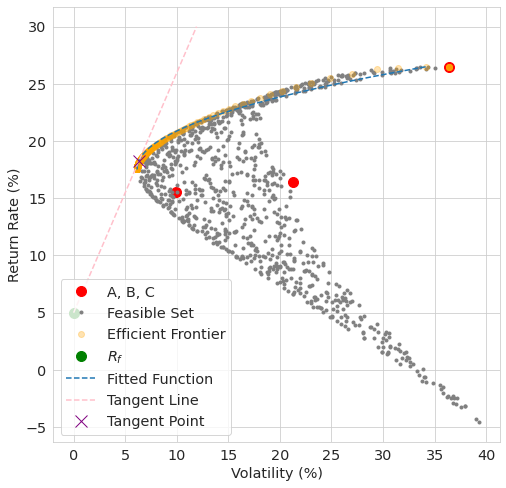

In [28]:
plt.figure(figsize = (8, 8))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, ".", color = "gray")
plt.plot(V_opt, R_opt, "o", color = "orange", alpha = 0.3)
plt.plot(0, 5, "go", ms = 10)

x_range = np.linspace(R_opt[np.argmin(V_opt)], np.max(R_opt), 101)
plt.plot(test_func(x_range, params[0], params[1], params[2]), x_range, "--")
x_range = np.linspace(5, 30)
plt.plot(tangent(x_range), x_range, "--", color = "pink")

x0 = (beta - params[1]) / params[0] / 2
plt.plot(tangent(x0), x0, "x", color = "purple", ms = 12)

plt.legend([", ".join(asset_names), "Feasible Set", "Efficient Frontier", "$R_f$", "Fitted Function", "Tangent Line", "Tangent Point"], loc = "best")

[ 6.47e-01]
[ 2.61e-01]
[ 9.24e-02]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


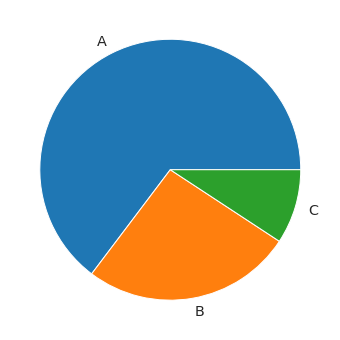

In [29]:
idx = np.argmin(np.abs(R_opt - x0))

print(weights[idx])
plt.pie(weights[idx], labels = tbl.columns)
plt.show()

### Example 3: FAANG

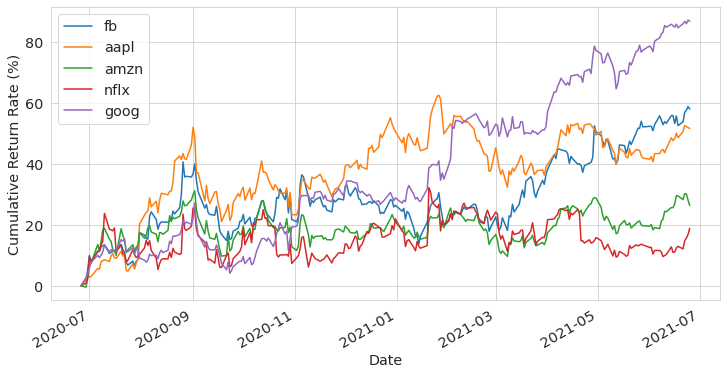

In [30]:
from datetime import date, timedelta

faang = ffn.get("fb, aapl, amzn, nflx, goog", start = date.today() - timedelta(days = 365))
(faang.rebase() - 100).plot(grid = True, ylabel = "Cumulative Return Rate (%)")

In [31]:
faang.calc_stats().display()

Stat                 fb          aapl        amzn        nflx        goog
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2020-06-26  2020-06-26  2020-06-26  2020-06-26  2020-06-26
End                  2021-06-25  2021-06-25  2021-06-25  2021-06-25  2021-06-25
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         57.98%      51.58%      26.31%      18.87%      86.77%
Daily Sharpe         1.49        1.38        0.91        0.62        2.43
Daily Sortino        2.87        2.43        1.65        1.10        4.37
CAGR                 58.23%      51.80%      26.41%      18.94%      87.17%
Max Drawdown         -19.17%     -20.38%     -16.41%     -17.29%     -18.11%
Calmar Ratio         3.04        2.54        1.61        1.10        4.81

MTD                  3.85%       6.82%       5.53%       4.82%       5.32%
3m                   22.47%      10.57%      11.66%      4.81%       24.24%
6m     

fb      57.695570
aapl    51.327692
amzn    26.196053
nflx    18.788262
goog    86.306799
Name: 2021-06-25 00:00:00, dtype: float64
fb      34.672604
aapl    34.291402
amzn    31.057315
nflx    41.252592
goog    27.302242
dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

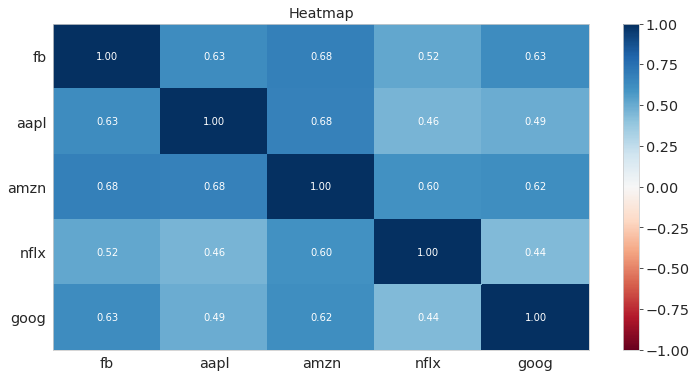

In [32]:
tbl = faang.pct_change().dropna() * 100
return_rates = (((1 + tbl / 100).cumprod()) ** (250 / tbl.shape[0]) * 100 - 100).iloc[-1, :]
print(return_rates)
stds = tbl.std() * np.sqrt(250)
print(stds)

tbl.plot_corr_heatmap()

In [33]:
w = np.random.uniform(0, 1, (10000, tbl.shape[1]))
w_sum = w.sum(axis = 1)
for idx, s in enumerate(w_sum):
    w[idx, :] = w[idx, :] / s

R = np.zeros((w.shape[0], 1))
V = np.zeros((w.shape[0], 1))
for i in range(w.shape[0]):
    curr_p = tbl.dot(w[i, :]) / 100
    R[i] = ((curr_p + 1).cumprod()[-1] ** (250 / curr_p.shape[0]) - 1) * 100
    V[i] = curr_p.std() * np.sqrt(250) * 100

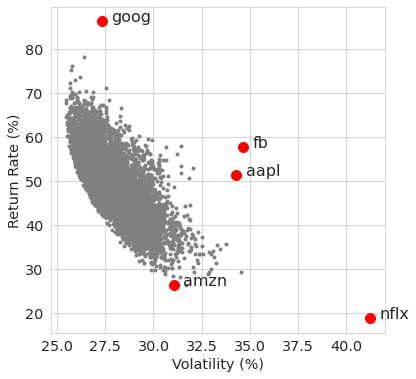

In [34]:
plt.figure(figsize = (6, 6))
plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, ".", color = "gray")
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")
plt.grid(True)

for idx, item in enumerate(tbl.columns):
    plt.text(stds[idx] + 0.5, return_rates[idx], item, fontsize = 16)

In [35]:
def optimize(return_rates):

    from cvxopt import matrix
    from cvxopt.blas import dot
    from cvxopt.solvers import qp, options

    options['show_progress'] = False
    
    return_rates = return_rates / 100
    N = return_rates.shape[1]

    p_ = (((1 + return_rates).cumprod() ** (250 / return_rates.shape[0])) - 1)
    p = matrix(p_.values[-1, :].T)
    S = matrix(return_rates.cov().values * 250)
    G = matrix(-np.eye(N))
    h = matrix(0.0, (N, 1))
    A = matrix(1.0, (1, N))
    b = matrix(1.0)
    
    risk_coeff = np.linspace(0, 1000, 101).tolist()
    weights = [qp(lmda * S, -p, G, h, A, b)["x"] for lmda in risk_coeff]

    R_opt = np.array([(np.dot(1 + return_rates.values, w).cumprod()[-1] ** (250 / return_rates.shape[0]) - 1) * 100 for w in weights])
    V_opt = np.array([np.sqrt(np.array(dot(w, S * w))) * 100 for w in weights])
    
    return weights, R_opt, V_opt

weights, R_opt, V_opt = optimize(tbl)

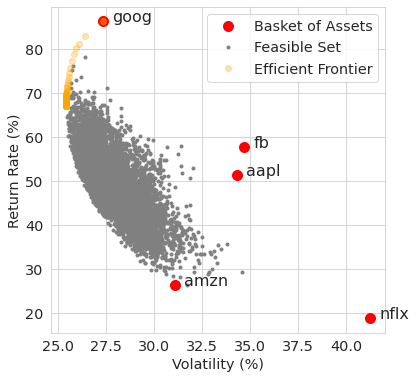

In [36]:
plt.figure(figsize = (6, 6))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V, R, ".", color = "gray")
plt.plot(V_opt, R_opt, "o", color = "orange", alpha = 0.3)
plt.legend(["Basket of Assets", "Feasible Set", "Efficient Frontier"], loc = "best")
for idx, item in enumerate(tbl.columns):
    plt.text(stds[idx] + 0.5, return_rates[idx], item, fontsize = 16)

In [37]:
sharpe_ratios = R_opt / V_opt
idx = np.argmax(sharpe_ratios)
print(tbl.columns)
print(weights[idx], V_opt[idx], R_opt[idx], sharpe_ratios[idx])

Index(['fb', 'aapl', 'amzn', 'nflx', 'goog'], dtype='object')
[ 3.31e-07]
[ 3.61e-06]
[ 2.65e-08]
[ 2.12e-08]
[ 1.00e+00]
 27.302202618932025 86.3066810373604 3.1611618389174656


### Example 4: TW50

In [38]:
!wget https://www.csie.ntu.edu.tw/~d00922011/python/data/tw50.csv

--2021-06-26 16:56:43--  https://www.csie.ntu.edu.tw/~d00922011/python/data/tw50.csv
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1029 (1.0K) [text/csv]
Saving to: ‘tw50.csv’

tw50.csv            100%[===================>]   1.00K  --.-KB/s    in 0s      

2021-06-26 16:56:43 (22.0 MB/s) - ‘tw50.csv’ saved [1029/1029]



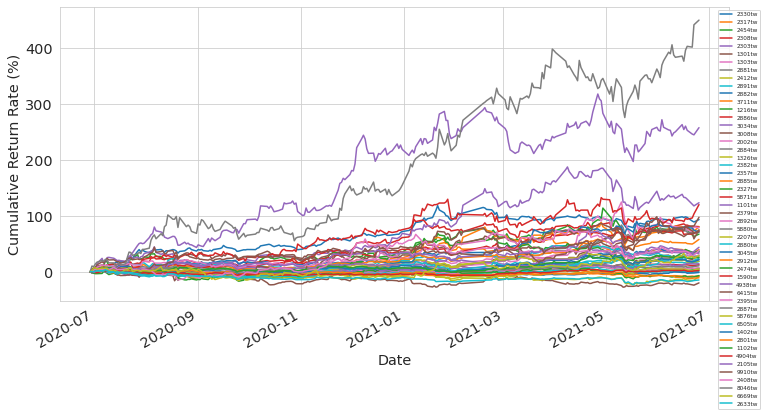

In [39]:
import pandas as pd
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')

tick_list = pd.read_csv("tw50.csv")
all_ticks = ",".join(tick_list["股票代號"].apply(lambda x : str(x) + ".tw"))
tw50 = ffn.get(all_ticks, start = date.today() - timedelta(days = 365))
(tw50.rebase() - 100).plot(grid = True, ylabel = "Cumulative Return Rate (%)")
plt.legend(loc = "upper right", prop = fontP, bbox_to_anchor=(1.05, 1))

In [40]:
tw50.calc_stats().display()

Stat                 2330tw      2317tw      2454tw      2308tw      2303tw      1301tw      1303tw      2881tw      2412tw      2891tw      2882tw      3711tw      1216tw      2886tw      3034tw      3008tw      2002tw      2884tw      1326tw      2382tw      2357tw      2885tw      2327tw      5871tw      1101tw      2379tw      2892tw      5880tw      2207tw      2880tw      3045tw      2912tw      2474tw      1590tw      4938tw      6415tw      2395tw      2887tw      5876tw      6505tw      1402tw      2801tw      1102tw      4904tw      2105tw      9910tw      2408tw      8046tw      6669tw      2633tw
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ---

In [41]:
tbl = tw50.pct_change().dropna() * 100
return_rates = (((1 + tbl / 100).cumprod()) ** (250 / tbl.shape[0]) * 100 - 100).iloc[-1, :]
print(return_rates)
stds = tbl.std() * np.sqrt(250)
print(stds)

2330tw     98.337610
2317tw     41.392717
2454tw     70.680996
2308tw     84.885137
2303tw    276.759800
1301tw     27.685594
1303tw     35.739477
2881tw     78.470569
2412tw      3.453248
2891tw     18.807359
2882tw     37.857422
3711tw     84.173298
1216tw      6.383142
2886tw     12.925746
3034tw    130.741604
3008tw    -20.867235
2002tw     82.618612
2884tw      4.846885
1326tw     19.615536
2382tw     30.338652
2357tw     74.121703
2885tw     60.656967
2327tw     38.628035
5871tw     76.463672
1101tw     34.667346
2379tw     75.766474
2892tw      7.228084
5880tw     10.873839
2207tw     -8.919784
2880tw      0.906751
3045tw     -1.481390
2912tw     -8.391920
2474tw     -7.319427
1590tw    127.111061
4938tw     14.717990
6415tw    102.744960
2395tw     31.425536
2887tw     22.622021
5876tw      5.283503
6505tw     24.677908
1402tw     22.243789
2801tw    -11.547250
1102tw     26.272821
4904tw      1.905857
2105tw     45.670398
9910tw     78.574714
2408tw     39.692483
8046tw    489

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

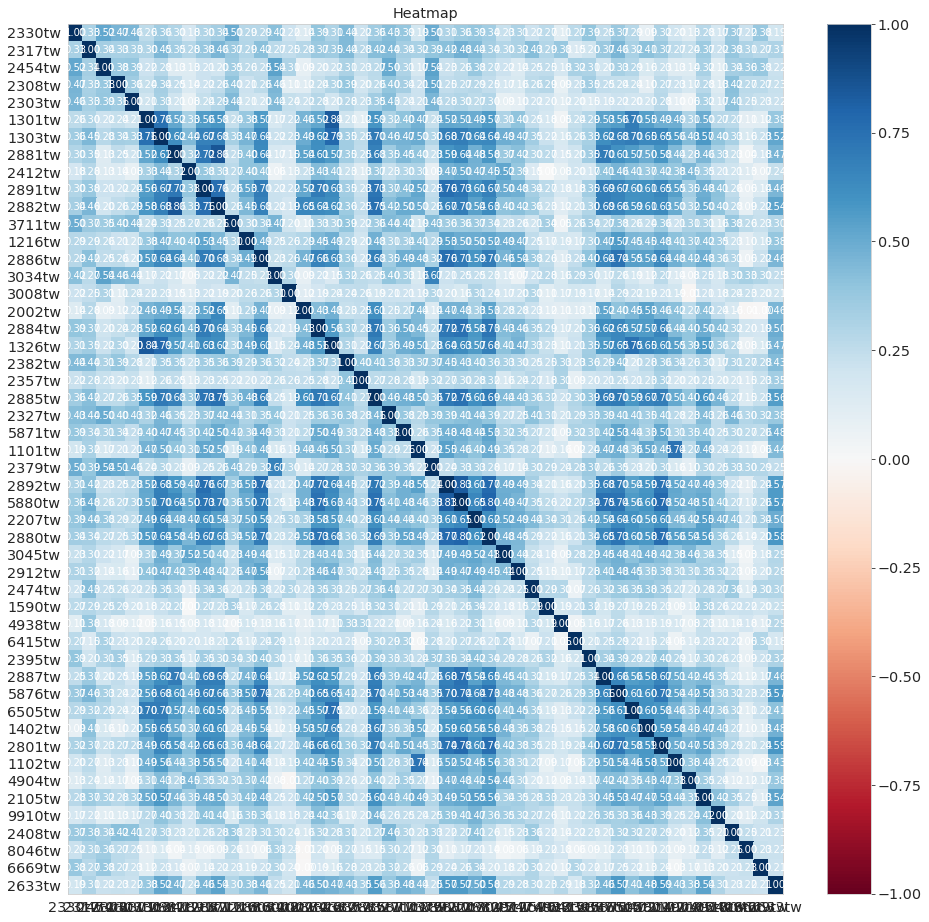

In [42]:
tbl.plot_corr_heatmap(figsize = (16, 16))

In [43]:
def optimize(return_rates):

    from cvxopt import matrix
    from cvxopt.blas import dot
    from cvxopt.solvers import qp, options

    options['show_progress'] = False
    
    return_rates = return_rates / 100
    N = return_rates.shape[1]

    p_ = (((1 + return_rates).cumprod() ** (250 / return_rates.shape[0])) - 1)
    p = matrix(p_.values[-1, :].T)
    S = matrix(return_rates.cov().values * 250)
    G = matrix(-np.eye(N))
    h = matrix(0.0, (N, 1))
    A = matrix(1.0, (1, N))
    b = matrix(1.0)
    
    risk_coeff = np.linspace(0, 1000, 1001).tolist()
    weights = [qp(lmda * S, -p, G, h, A, b)["x"] for lmda in risk_coeff]

    R_opt = np.array([(np.dot(1 + return_rates.values, w).cumprod()[-1] ** (250 / return_rates.shape[0]) - 1) * 100 for w in weights])
    V_opt = np.array([np.sqrt(np.array(dot(w, S * w))) * 100 for w in weights])
    
    return weights, R_opt, V_opt

weights, R_opt, V_opt = optimize(tbl)

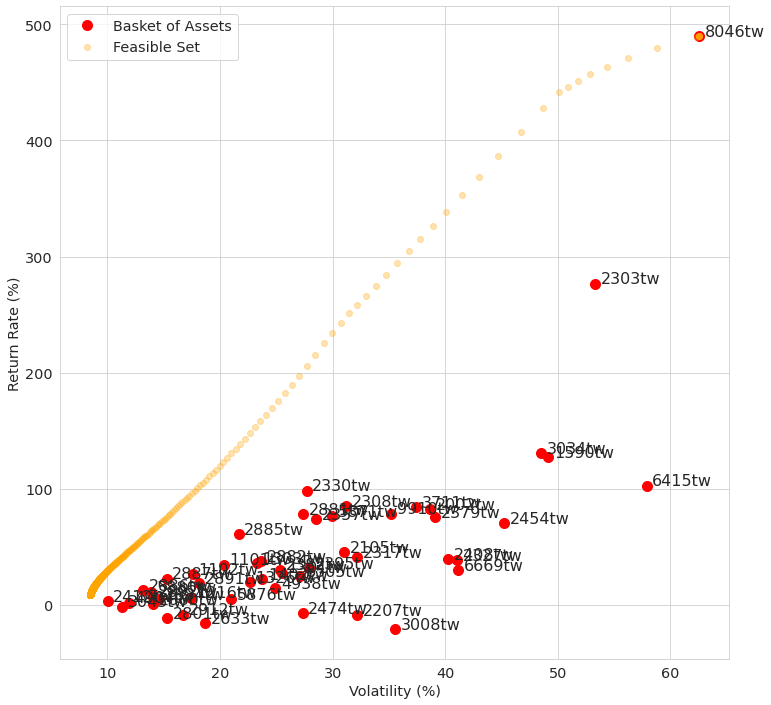

In [44]:
plt.figure(figsize = (12, 12))
plt.grid(True)
plt.xlabel("Volatility (%)")
plt.ylabel("Return Rate (%)")

plt.plot(stds, return_rates, "ro", ms = 10)
plt.plot(V_opt, R_opt, "o", color = "orange", alpha = 0.3)
plt.legend(["Basket of Assets", "Feasible Set", "Efficient Frontier"], loc = "best")
for idx, item in enumerate(tbl.columns):
    plt.text(stds[idx] + 0.5, return_rates[idx], item, fontsize = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


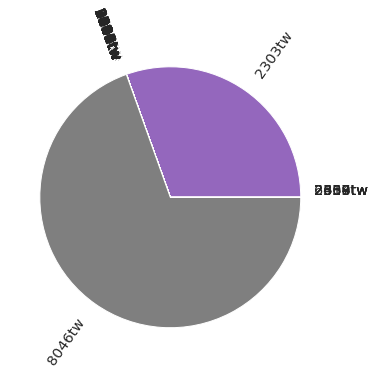

50.13061569935117 441.8666086746449 8.814306437500306


In [45]:
sharpe_ratios = R_opt / V_opt
idx = np.argmax(sharpe_ratios)
plt.pie(weights[idx], rotatelabels = True, labels = tbl.columns)
plt.show()
print(V_opt[idx], R_opt[idx], sharpe_ratios[idx])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


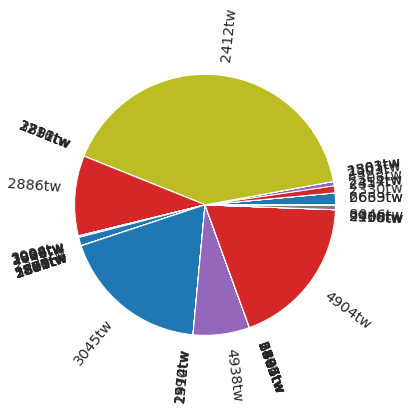

8.473380818249193 8.592535388803668 1.0140622229910699


In [46]:
idx = np.argmin(V_opt)
plt.pie(weights[idx], rotatelabels = True, labels = tbl.columns)
plt.show()
print(V_opt[idx], R_opt[idx], sharpe_ratios[idx])

## Limitation of Diversification
- "Don't put all your eggs in one basket."
- However, we cannot diversify all risks by forming the portfolio containing all (even infinite numbers) of risky assets.

In [47]:
def simulation(n_assets):

    rs = np.random.RandomState(19937)
    values = rs.randn(365, n_assets) / 100
    dates = pd.date_range("2050-01-01", periods = 365, freq = "D")
    tbl = pd.DataFrame(values, dates) * 100 * 5

    curr_p = (tbl / 100 / n_assets).sum(axis = 1)
    V = curr_p.std() * np.sqrt(tbl.shape[0]) * 100
    return V

min_V = [simulation(n) for n in range(1, 301, 10)]

Text(100, 1, 'Undiversifiable Risk')

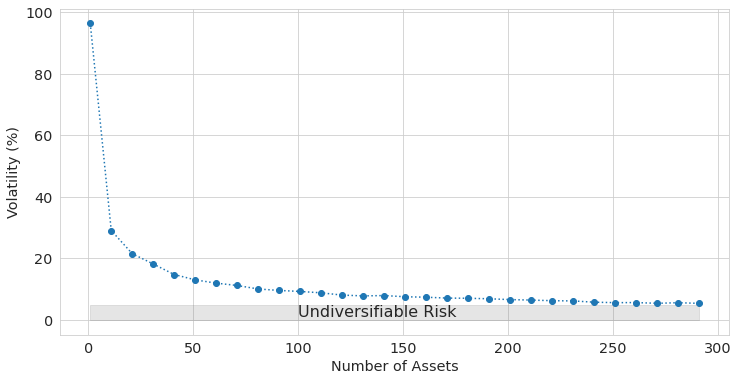

In [48]:
plt.plot(range(1, 301, 10), min_V, "o:")
plt.fill_between(range(1, 301, 10), y1 = 0, y2 = 5, color = "gray", alpha = 0.2)
plt.ylabel("Volatility (%)")
plt.xlabel("Number of Assets")
plt.text(100, 1, "Undiversifiable Risk", fontsize = 16)

## Black-Litterman Model: A Bayesian Approach
- References:
    - Black and Litterman (1992): [Global Portfolio Optimization](http://www.sef.hku.hk/tpg/econ6017/2011/black-litterman-1992.pdf)
    - Online calculator: https://www.portfoliovisualizer.com/black-litterman-model